In [ ]:
from elevator import (
        People,
        InternalQueue,
        ExternalQueue,
        Outlist,
        Elevator,
        OutlistMethods,
        QueueMethods,
        Generator,
    )
import numpy as np
import pprint as pp
import matplotlib.pyplot as plt

def AMONGUS(floorAmount : int):
    meanWaitingTimeHistory = []
    meanJourneyTimeHistory = []
    meanElevatorBreakCountHistory = []

    insideQueue = InternalQueue(floorAmount=floorAmount)
    externalQueueUp = ExternalQueue(floorAmount=floorAmount)
    externalQueueDown = ExternalQueue(floorAmount=floorAmount)
    outlist = Outlist()
    elevator = Elevator(
        currentDirection=False,
        currentFloor=0,
        lowestFloor=0,
        highestFloor=floorAmount - 1,
        carryingCapacity=10000,
        bufferCutoff=80,
        internalQueue=insideQueue,
        externalQueueUp=externalQueueUp,
        externalQueueDown=externalQueueDown,
        outlist=outlist,
        activeSpeed=20,
        bufferSpeed=4,
    )

    generators = []
    for i in range(floorAmount):
        generators.append(
            Generator(
                initFloor=i,
                finalFloorRange=[j for j in range(floorAmount) if j != i],
                finalFloorWeight=[1 for _ in range(floorAmount - 1)],
                amountRange=[1 for _ in range(floorAmount - 1)],
                amountWeight=[1 for _ in range(floorAmount - 1)],
                targetElevator=elevator,
                attemptPerCall=1,
                probability=0.005/floorAmount,
            )
        )

    outStats = OutlistMethods(outlist)

    elevator.currentFloor = 0
    elevator.currentDirection = True
    elevator.outlist.outlist.clear()
    #elevator.printElevatorInfo()

    for _ in range(3000):
        for i in generators:
            i.generatePeopleToElevator()

        elevator.progressElevator()

    return outStats.meanWaitingTime(), outStats.meanJourneyTime(), outStats.meanElevatorBreakCount()

In [24]:
waitingTimeByFloor, journeyTimeByFloor, breaksByFloor = [], [], []
for i in range(2,100):
    print(i)
    one, two, three = AMONGUS(i)
    waitingTimeByFloor.append(one)
    journeyTimeByFloor.append(two)
    breaksByFloor.append(three)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


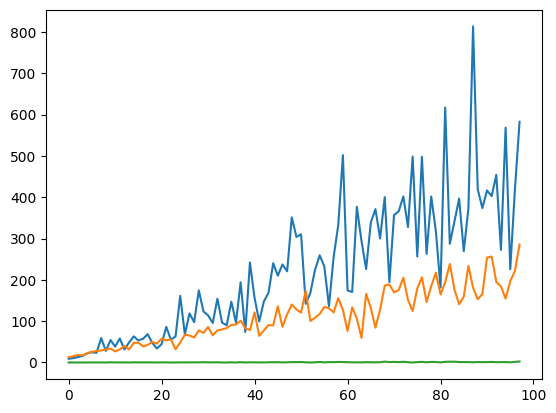

In [25]:

plt.plot(waitingTimeByFloor)
plt.plot(journeyTimeByFloor)
plt.plot(breaksByFloor)
